In [2]:
from gurobipy import *
import math
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import re

We create the graph with its nodes, edges, and attributes

Graph with 13 nodes and 18 edges
[(0, {'S': 0}), (1, {'S': 1}), (2, {'S': 0}), (3, {'S': 1}), (4, {'S': 1}), (5, {'S': 0}), (6, {'S': 0}), (7, {'S': 0}), (8, {'S': 1}), (9, {'S': 1}), (10, {'S': 0}), (11, {'S': 0}), (12, {'S': 0})]
[(0, 1), (0, 2), (1, 3), (1, 4), (2, 3), (3, 6), (3, 8), (4, 5), (4, 6), (5, 7), (6, 7), (6, 9), (8, 9), (8, 10), (8, 11), (9, 10), (9, 12), (11, 12)]


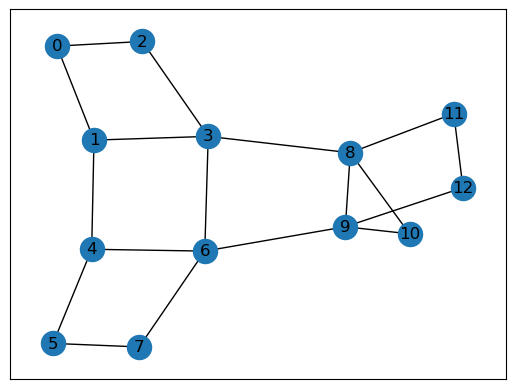

In [3]:
V=nx.Graph()
N=5
for k in range(13):
    V.add_node(k)
V.add_edges_from([(0,1),(0,2),(2,3),(1,3),(1,4),(4,5),(5,7),(3,6),(4,6),(6,7),(3,8),(6,9),(8,9),(8,10),(9,10),(8,11),(9,12),(11,12)])
print(V)
#13498
V.nodes[0]['S']=0
V.nodes[1]['S']=1
V.nodes[2]['S']=0
V.nodes[3]['S']=1
V.nodes[4]['S']=1
V.nodes[5]['S']=0
V.nodes[6]['S']=0
V.nodes[7]['S']=0
V.nodes[8]['S']=1
V.nodes[9]['S']=1
V.nodes[10]['S']=0
V.nodes[11]['S']=0
V.nodes[12]['S']=0
print(V.nodes.data())
print(V.edges())
nx.draw_networkx(V, with_labels=True)

In [4]:
nw_mod=Model(name="nw")
N=5

C=100
c=10


delta_ij = nw_mod.addVars(V.number_of_nodes(),V.number_of_nodes(),name='delta_{i}_{j}',vtype=GRB.BINARY)
x=nw_mod.addVars(V.number_of_nodes(),name='x',vtype=GRB.BINARY)
y=nw_mod.addVars(V.number_of_nodes(),name='y',vtype=GRB.BINARY)
z=nw_mod.addVars(V.number_of_nodes(),name='z',vtype=GRB.BINARY)

obj_fun=sum(c*delta_ij[i,j] for i,j in V.edges())
nw_mod.setObjective(obj_fun, GRB.MINIMIZE)

for i in V.nodes():
    nw_mod.addConstr(x[i] + y[i] + z[i] == 1, 'constraint_one_subd{i}')
    
#nw_mod.addConstr(sum(V.nodes[i]['S'] * x[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_x')
#nw_mod.addConstr(sum(V.nodes[i]['S'] * y[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_y')
#nw_mod.addConstr(sum(V.nodes[i]['S'] * z[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_z')

nw_mod.addConstr(sum(V.nodes[i]['S'] * x[i] for i in V.nodes()) <= (math.ceil(N/2)) - 1, 'constraint_sum_S_x')
nw_mod.addConstr(sum(V.nodes[i]['S'] * y[i] for i in V.nodes()) <= (math.ceil(N/2)) - 1, 'constraint_sum_S_y')
nw_mod.addConstr(sum(V.nodes[i]['S'] * z[i] for i in V.nodes()) <= (math.ceil(N/2)) - 1, 'constraint_sum_S_z')

#nw_mod.addConstr(sum(x[i] for i in V.nodes())>=sum(y[i] for i in V.nodes()),'constraint_max_x')
#nw_mod.addConstr(sum(y[i] for i in V.nodes())>=sum(z[i] for i in V.nodes()),'constraint_max_y')

#nw_mod.addConstr(sum(x[i] for i in V.nodes())>=sum(y[i] for i in V.nodes())+sum(z[i] for i in V.nodes()),'constraint_max_x')

#nw_mod.addConstr(sum(int(V.nodes[i]['S']) * x[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_x')
#nw_mod.addConstr(sum(int(V.nodes[i]['S']) * y[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_y')
#nw_mod.addConstr(sum(int(V.nodes[i]['S']) * z[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_z')


Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-29


<gurobi.Constr *Awaiting Model Update*>

In [5]:
'''for i in V.nodes():
    for j in V.nodes():
        if V.has_edge(i,j)
                nw_mod.addConstr(delta_ij[i,j] <= 2 - x[i] - x[j], 'constraint_delta_ij_x_{i}_{j}_same_x ') 
                nw_mod.addConstr(delta_ij[i,j] <= 2 - y[i] - y[j], 'constraint_delta_ij_x_{i}_{j}_same_y ')
                nw_mod.addConstr(delta_ij[i,j] <= 2 - x[i] - z[j], 'constraint_delta_ij_x_{i}_{j}_same_z ')
                nw_mod.addConstr(delta_ij[i,j] >= x[i] - x[j], 'constraint_delta_ij_x_{i}_{j}_not_same_x ')
                nw_mod.addConstr(delta_ij[i,j] >= y[i] - y[j], 'constraint_delta_ij_x_{i}_{j}_not_same_y ')
                nw_mod.addConstr(delta_ij[i,j] >= z[i] - z[j], 'constraint_delta_ij_x_{i}_{j}_not_same_z ')
'''
for i, j in V.edges():
    nw_mod.addConstr(delta_ij[i, j] <= 2 - x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_same_x')
    nw_mod.addConstr(delta_ij[j, i] <= 2 - x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_same_x_2')
    nw_mod.addConstr(delta_ij[i, j] <= 2 - y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_same_y')
    nw_mod.addConstr(delta_ij[j, i] <= 2 - y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_same_y_2')
    nw_mod.addConstr(delta_ij[i, j] <= 2 - z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_same_z')
    nw_mod.addConstr(delta_ij[j, i] <= 2 - z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_same_z_2')
    nw_mod.addConstr(delta_ij[i, j] >= x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_not_same_x')
    nw_mod.addConstr(delta_ij[j, i] >= x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_not_same_x_2')
    nw_mod.addConstr(delta_ij[i, j] >= y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_not_same_y')
    nw_mod.addConstr(delta_ij[j, i] >= y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_not_same_y_2')
    nw_mod.addConstr(delta_ij[i, j] >= z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_not_same_z')
    nw_mod.addConstr(delta_ij[j, i] >= z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_not_same_z_2')


In [8]:



#nw_mod.setParam('OutputFlag',False)
nw_mod.optimize()
#nw_mod.computeIIS()
print('Optimization is done. Objective function value: %.2f' % nw_mod.objVal)
deltas={}
x_arr={}
y_arr={}
z_arr={}

for v in nw_mod.getVars():
    if re.match('delta',v.varName) is not None and v.x!=0:
        deltas[v.varName]=v.x
    if re.match('x',v.varName) is not None:
        x_arr[v.varName]=v.x
    if re.match('y',v.varName) is not None:
        y_arr[v.varName]=v.x
    if re.match('z',v.varName) is not None:
        z_arr[v.varName]=v.x
dist=[]
dist.append(x_arr)
dist.append(y_arr)
dist.append(z_arr)

dfdelta=pd.DataFrame.from_dict(deltas,orient='index')
#print(dfdist)
print("List of links cut:")
print(dfdelta)

tmpx=[]
tmpy=[]
tmpz=[]
for i in x_arr:
    
    if x_arr[i]==1:
        tmpx.append(list(x_arr).index(i))
print("Nodes in partition X:")
print(tmpx)
for i in y_arr:
    
    if y_arr[i]==1:
        tmpy.append(list(y_arr).index(i))
print("Nodes in partition Y:")
print(tmpy)
for i in z_arr:
    
    if z_arr[i]==1:
        tmpz.append(list(z_arr).index(i))
print("Nodes in partition Z:")
print(tmpz)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 232 rows, 208 columns and 702 nonzeros
Model fingerprint: 0xd06803b0
Variable types: 0 continuous, 208 integer (208 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolved: 232 rows, 75 columns, 702 nonzeros

Continuing optimization...


Cutting planes:
  Gomory: 4
  MIR: 14
  Zero half: 9
  RLT: 14
  BQP: 1

Explored 1 nodes (145 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 5: 40 50 70 ... 90

Optimal solution found (tolerance 1.00e-04)
Best objective 4.000000000000e+01, best bound 4.000000000000e+01, gap 0.0000%
Optim

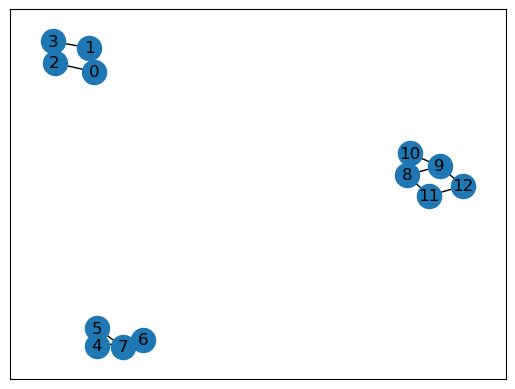

In [6]:

edges_to_remove = []
for i, j in V.edges():

    if delta_ij[i, j].X == 1:
        
        edges_to_remove.append((i, j))

for edge in edges_to_remove:
    V.remove_edge(*edge)
nx.draw_networkx(V, with_labels=True)